### Random Forest model validation

In [3]:
library(raster)
library(rgdal)
setwd("~/RDemo/capstone/Sentinel2data")
img.classified <- raster("RF_classification2.tif")

In [4]:
samplesperclass <- 50
smp.test <- sampleStratified(x = img.classified, 
                             size = samplesperclass, 
                             na.rm = TRUE, # exclude all NA values
                             sp = TRUE)

In [5]:
smp.test$RF_classification2
smp.test <- smp.test[sample(nrow(smp.test)), ] # mix the samples
smp.test$RF_classification2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[186] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[223] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
[260] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[297] 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
[334] 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
[371] 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8

[1] 2 7 4 2 6 5 5 1 8 8 7 6 7 2 8 7 4 6 1 2 7 6 6 3 6 1 7 3 4 4 2 1 4 3 1 7 2
 [38] 3 3 1 7 4 2 2 1 7 2 5 4 1 1 8 1 7 2 7 7 3 4 1 3 4 2 3 7 3 8 4 7 8 7 1 7 8
 [75] 8 3 3 8 5 3 5 7 4 6 1 4 4 8 7 2 2 8 6 8 6 3 8 2 8 5 4 6 7 1 1 6 3 1 1 2 2
[112] 8 3 5 5 2 8 5 2 2 3 5 8 1 2 2 6 4 5 8 3 1 2 3 8 2 2 6 1 5 2 8 5 6 1 8 7 4
[149] 8 8 1 6 7 6 3 6 6 4 2 4 2 3 3 5 4 4 8 2 5 6 3 2 1 3 5 7 5 4 8 8 4 7 6 4 6
[186] 7 8 7 3 2 3 8 8 5 7 7 5 8 4 7 7 4 1 4 5 2 5 4 2 8 5 2 5 2 8 2 8 4 4 3 6 3
[223] 4 3 6 6 5 1 6 3 5 7 6 8 2 1 4 2 4 8 8 3 5 1 6 2 7 4 4 2 6 1 3 7 1 8 1 2 3
[260] 6 8 7 4 6 5 2 7 5 7 1 2 5 5 6 3 6 8 4 3 2 8 3 3 4 7 5 6 3 5 3 3 1 2 7 4 3
[297] 4 5 6 2 4 5 8 1 7 6 8 1 5 2 5 4 7 1 4 6 1 4 2 8 1 6 1 4 7 1 5 3 4 7 8 4 7
[334] 3 5 3 7 4 5 3 2 6 8 1 5 3 5 2 5 5 6 1 2 1 1 3 7 5 7 6 5 8 3 6 8 1 4 6 5 7
[371] 6 1 1 3 8 5 6 1 7 4 6 7 1 7 4 6 8 6 6 8 1 6 6 5 3 5 3 7 5 1

Delete all variables in our dataframe smp.test and append a consecutive ID variable called ID, which will then be displayed to us in QGIS:

In [6]:
smp.test <- smp.test[, -c(1, 2)]
smp.test$ID <- 1:nrow(smp.test)
smp.test

          coordinates  ID
71  (674965, 5923115)   1
321 (683365, 5907865)   2
174 (681075, 5937115)   3
73  (686005, 5933425)   4
293 (675235, 5905145)   5
226 (674015, 5910945)   6
248 (685425, 5925665)   7
49  (676535, 5898995)   8
372 (687825, 5915605)   9
398 (687865, 5911545)  10
309 (685285, 5908955)  11
251 (674005, 5910955)  12
348 (686295, 5908195)  13
98  (670065, 5916355)  14
380 (679125, 5915625)  15
328 (687555, 5921945)  16
186 (671005, 5936265)  17
280 (668255, 5915055)  18
47  (675745, 5910465)  19
69  (680885, 5927065)  20
301 (690465, 5924375)  21
285 (679735, 5911715)  22
286 (691995, 5907645)  23
120 (679555, 5902115)  24
291 (681985, 5926285)  25
8   (675775, 5899845)  26
342 (678675, 5926655)  27
140 (692615, 5904135)  28
171 (671675, 5901805)  29
163 (688475, 5901375)  30
89  (667435, 5913695)  31
26  (694915, 5917455)  32
161 (677115, 5930335)  33
132 (684445, 5910745)  34
14  (687305, 5908985)  35
350 (678775, 5910925)  36
60  (686385, 5928555)  37
109 (687215,

Check the distribution of our validation points:

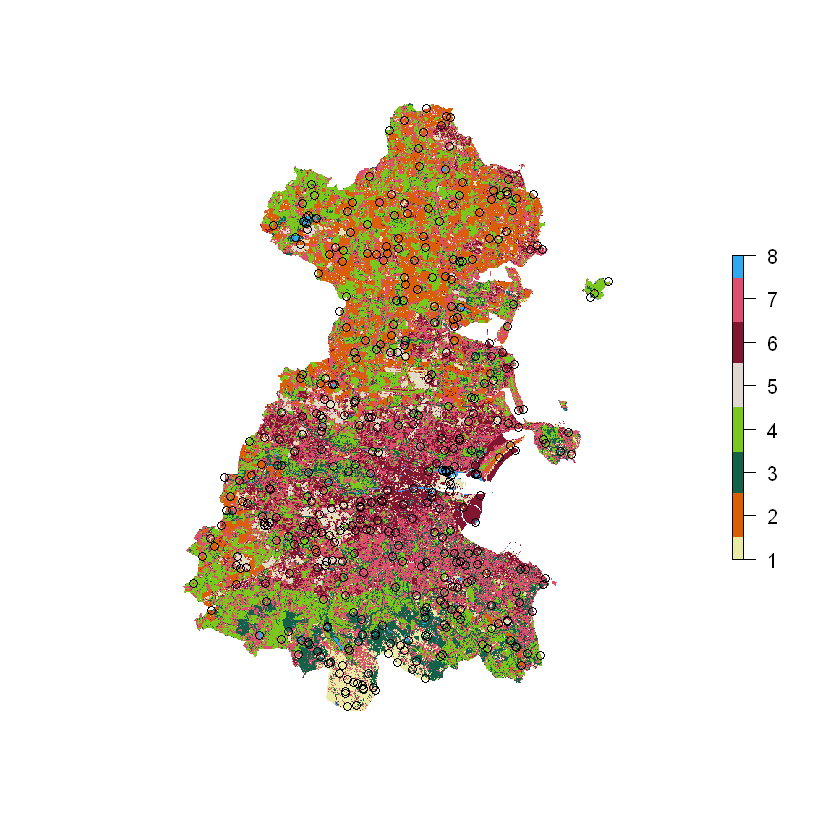

In [7]:
plot(img.classified, 
     axes = FALSE, 
     box = FALSE,
     col = c("#e9eba4","#D95F02","#14614a","#78c91c","#e0d7d1","#801630","#de4e71","#2eabf0")
)
points(smp.test) 

Save the spatial point data frame smp.test as a shapefile to hard drive:

In [ ]:
# shapefile(smp.test,
#           filename = "validation_RF.shp",
#           overwrite = TRUE
# )